# Project II - Supervised Learning

##### Github Link : https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-klbaligala94

### Thera Bank Personal Loan Campaign

#### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain:
Banking

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
#Import data engineering librarites
import pandas as pd
import numpy as np

#Import data visualization libraries
import seaborn as sns
import matplotlib as mt
sns.set(color_codes=True) 
%matplotlib inline

#Import data modeling libraries
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score,precision_score, f1_score, roc_auc_score,roc_curve,accuracy_score

#Notebook Output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Import dataset
bank_ds = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

#Check imported dataset layout
bank_ds.head()

#Check datatype and shape of the dataset
bank_ds.info()
bank_ds.shape

#Check null values for all variables
bank_ds.isnull().values.any()

#Statistical Summary of each variable in the dataset 
bank_ds.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


(5000, 14)

False

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


* Based from the above results, there are 5000 rows(people) and 14 variables in the dataset.
* There are no null values for all variables as shown from the results of the info and isnull functions.
* By looking at the statistical summary, notice that variable "Experience" has negative values(min=-3) which are odd values for the variable as we are expecting only positive values for work experience. We need to replace this below with more appropriate values for our modeling exercise.

### 2. EDA: Study the data distribution in each attribute and target variable, share your findings

#### Number of unique values in each column

In [3]:
bank_ds.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### Number of people with zero mortgage
* There are 3462 people with 0 mortgage.

In [4]:
bank_ds[bank_ds["Mortgage"]==0].shape

(3462, 14)

#### Number of people with zero credit card spending per month
* There are  106 people with zero credit card spending per month.

In [5]:
bank_ds[bank_ds["CCAvg"]==0].shape  

(106, 14)

#### Value counts of all categorical columns

Initially, you would think of applying value counts using the datatype of the variables in the dataset.
However, you might notice that all datatypes in the dataset are recorded as int (even for Zipcode) as these are numbers.
Thus, below method would not output anything.

In [6]:
for i in list(bank_ds.columns[bank_ds.dtypes=='object']):   # checking value counts of all object type columns
    print(bank_ds[i].value_counts())
    print()

In line with the above, there are actually columns that we can consider as 'categorical'; depending on how we picture it.
Indicator variables (0/1) might be viewed categorical as well as variables with definite number of levels.

In [7]:
# ZIP Code is categorical
bank_ds['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

In [8]:
#Education level is categorical but inputed as numeric value.
bank_ds['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [9]:
# Personal Loan is an indicator variable; it could be viewed as categorical variable answerable by Yes/No
bank_ds['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [10]:
# Securities Account is an indicator variable; it could be viewed as categorical variable answerable by Yes/No
bank_ds['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [11]:
# CD Account is an indicator variable; it could be viewed as categorical variable answerable by Yes/No
bank_ds['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [12]:
# Online is an indicator variable; it could be viewed as categorical variable answerable by Yes/No
bank_ds['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [13]:
# CreditCard is an indicator variable; it could be viewed as categorical variable answerable by Yes/No
bank_ds['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [14]:
# Family is discrete numeric variable but we could view it as categorical as well due to few levels
bank_ds['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

#### Univariate Analysis

In [15]:
#Data Preparation for Visualization

#Extract Numeric variables from the dataset
columns = list(bank_ds)[1:] 
columns_num = [i for i in columns if i not in ('ZIP Code','Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard')]
columns_num

#Extract Categorical variables from the dataset
columns_cat = [j for j in columns if j in ('Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard')]
columns_cat

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

['Family',
 'Education',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

#### Histogram and Boxplot: Distribution of numeric variables in the dataset
* Age and Experience variables follow almost platykurtic even distributions.
* Other numeric variables (Income,CCAvg,Mortgage) are right skewed distributions.

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Age Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Experience Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Income Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'CCAvg Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Mortgage Overall Distribution')

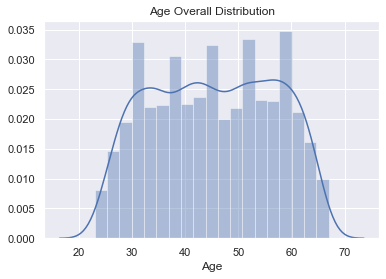

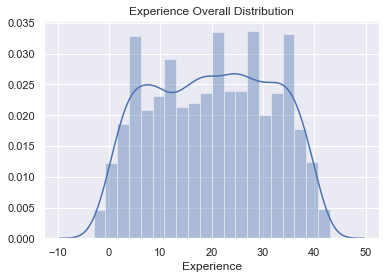

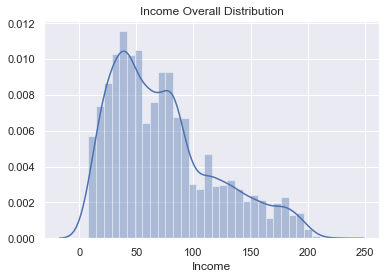

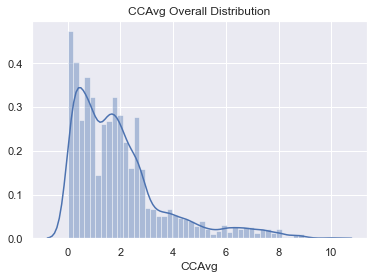

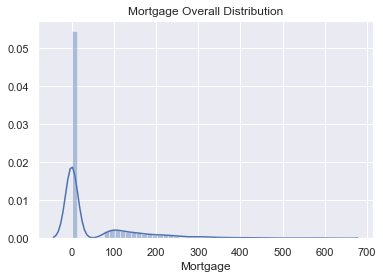

In [16]:
#Histrogram
for column in columns_num:
    mt.pyplot.figure()  
    sns.distplot(bank_ds[column]).set_title(column + ' Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Age Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Experience Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Income Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'CCAvg Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Mortgage Boxplot Distribution')

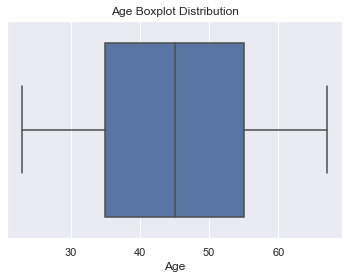

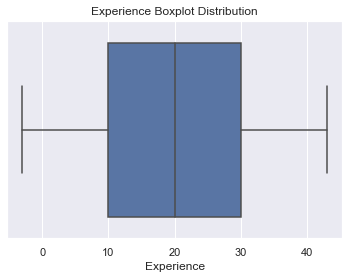

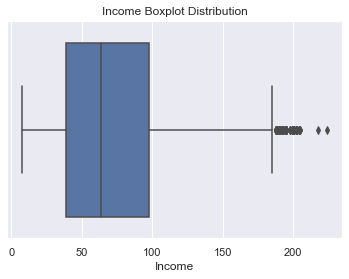

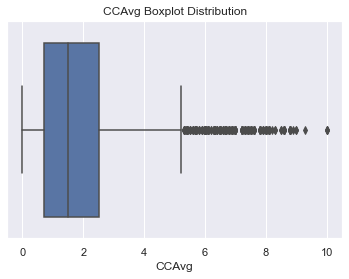

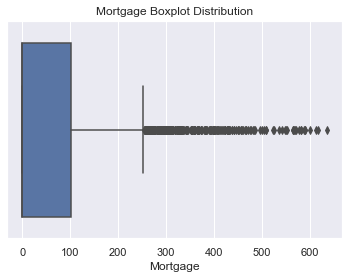

In [17]:
#Boxplot
for column in columns_num:
    mt.pyplot.figure()  
    sns.boxplot(bank_ds[column]).set_title(column + ' Boxplot Distribution')


#### Count plots: Frequency Distribution of Categorical variables in the dataset

* Family distribution seems to be evenly distributed
* Most customers have Bachelor/Undergrad Education 
* Only 9.6% of customers have accepted personal loan offered in the last campaign
* 10.4 % of customers have securities account with the bank
* 6% of customers have CD accounts with the bank
* 60% of customers use internet banking facilities
* 71% of customers use credit card issued by the bank

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Family Frequency Distribution')

1    29.44
2    25.92
4    24.44
3    20.20
Name: Family, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Education Frequency Distribution')

1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Personal Loan Frequency Distribution')

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Securities Account Frequency Distribution')

0    89.56
1    10.44
Name: Securities Account, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'CD Account Frequency Distribution')

0    93.96
1     6.04
Name: CD Account, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Online Frequency Distribution')

1    59.68
0    40.32
Name: Online, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'CreditCard Frequency Distribution')

0    70.6
1    29.4
Name: CreditCard, dtype: float64

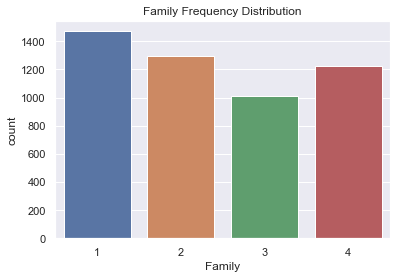

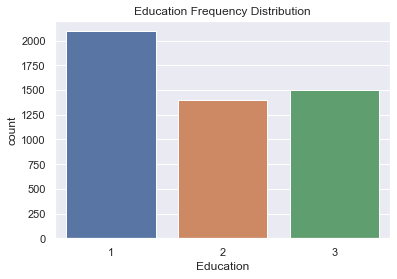

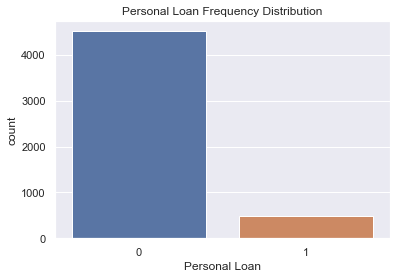

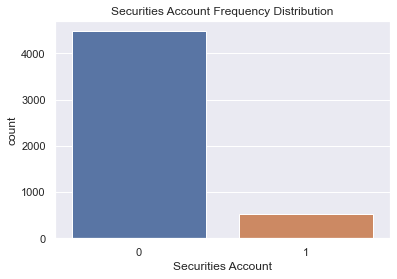

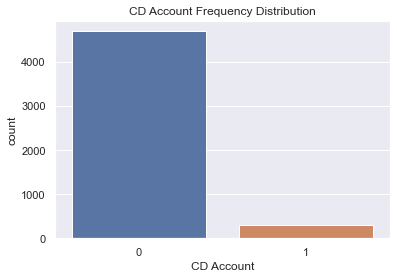

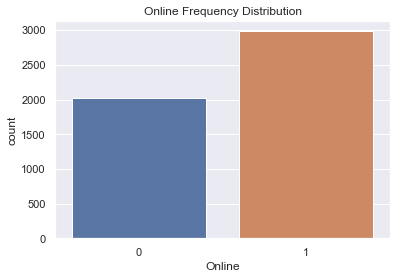

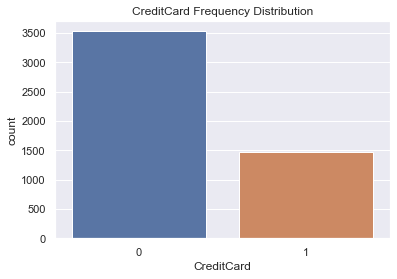

In [18]:
#Countplot
for columnc in columns_cat:
    mt.pyplot.figure()  
    sns.countplot(bank_ds[columnc]).set_title(columnc + ' Frequency Distribution') #countplots on each variable
    bank_ds[columnc].value_counts(normalize=True) * 100     #Percentage total across levels on each variable

#### Bivariate Distribution

In [19]:
#Create new dataframe with dropping ZIP Code and ID columns as these are not relevant to modeling
bank_ds2 = bank_ds.drop(bank_ds.columns[[0,4]], axis=1) 

In [20]:
#output correlation matrix
bank_ds2.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [21]:
#Create function to output correlation plot

def plot_corr(bank_ds2, size=12):
    corr = bank_ds2.corr()
    fig, ax = mt.pyplot.subplots(figsize=(size, size))
    ax.matshow(corr,cmap = 'Greens')
    mt.pyplot.xticks(range(len(corr.columns)), corr.columns)
    mt.pyplot.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')

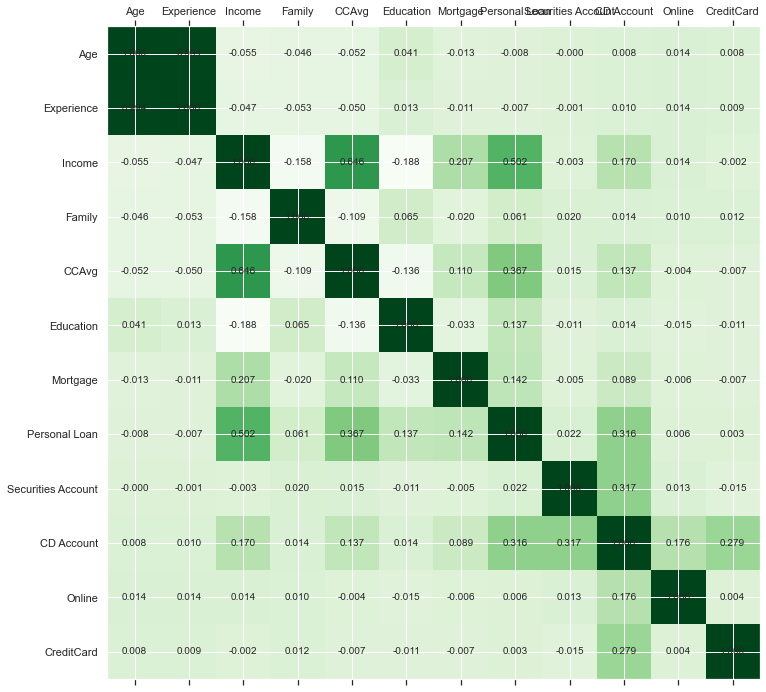

In [22]:
plot_corr(bank_ds2)

* Personal Loan is positively correlated with Income, CCAvg, and CD Account.
* Also, it is worth noting that there is a strong positive correlation between Income and CCAvg.

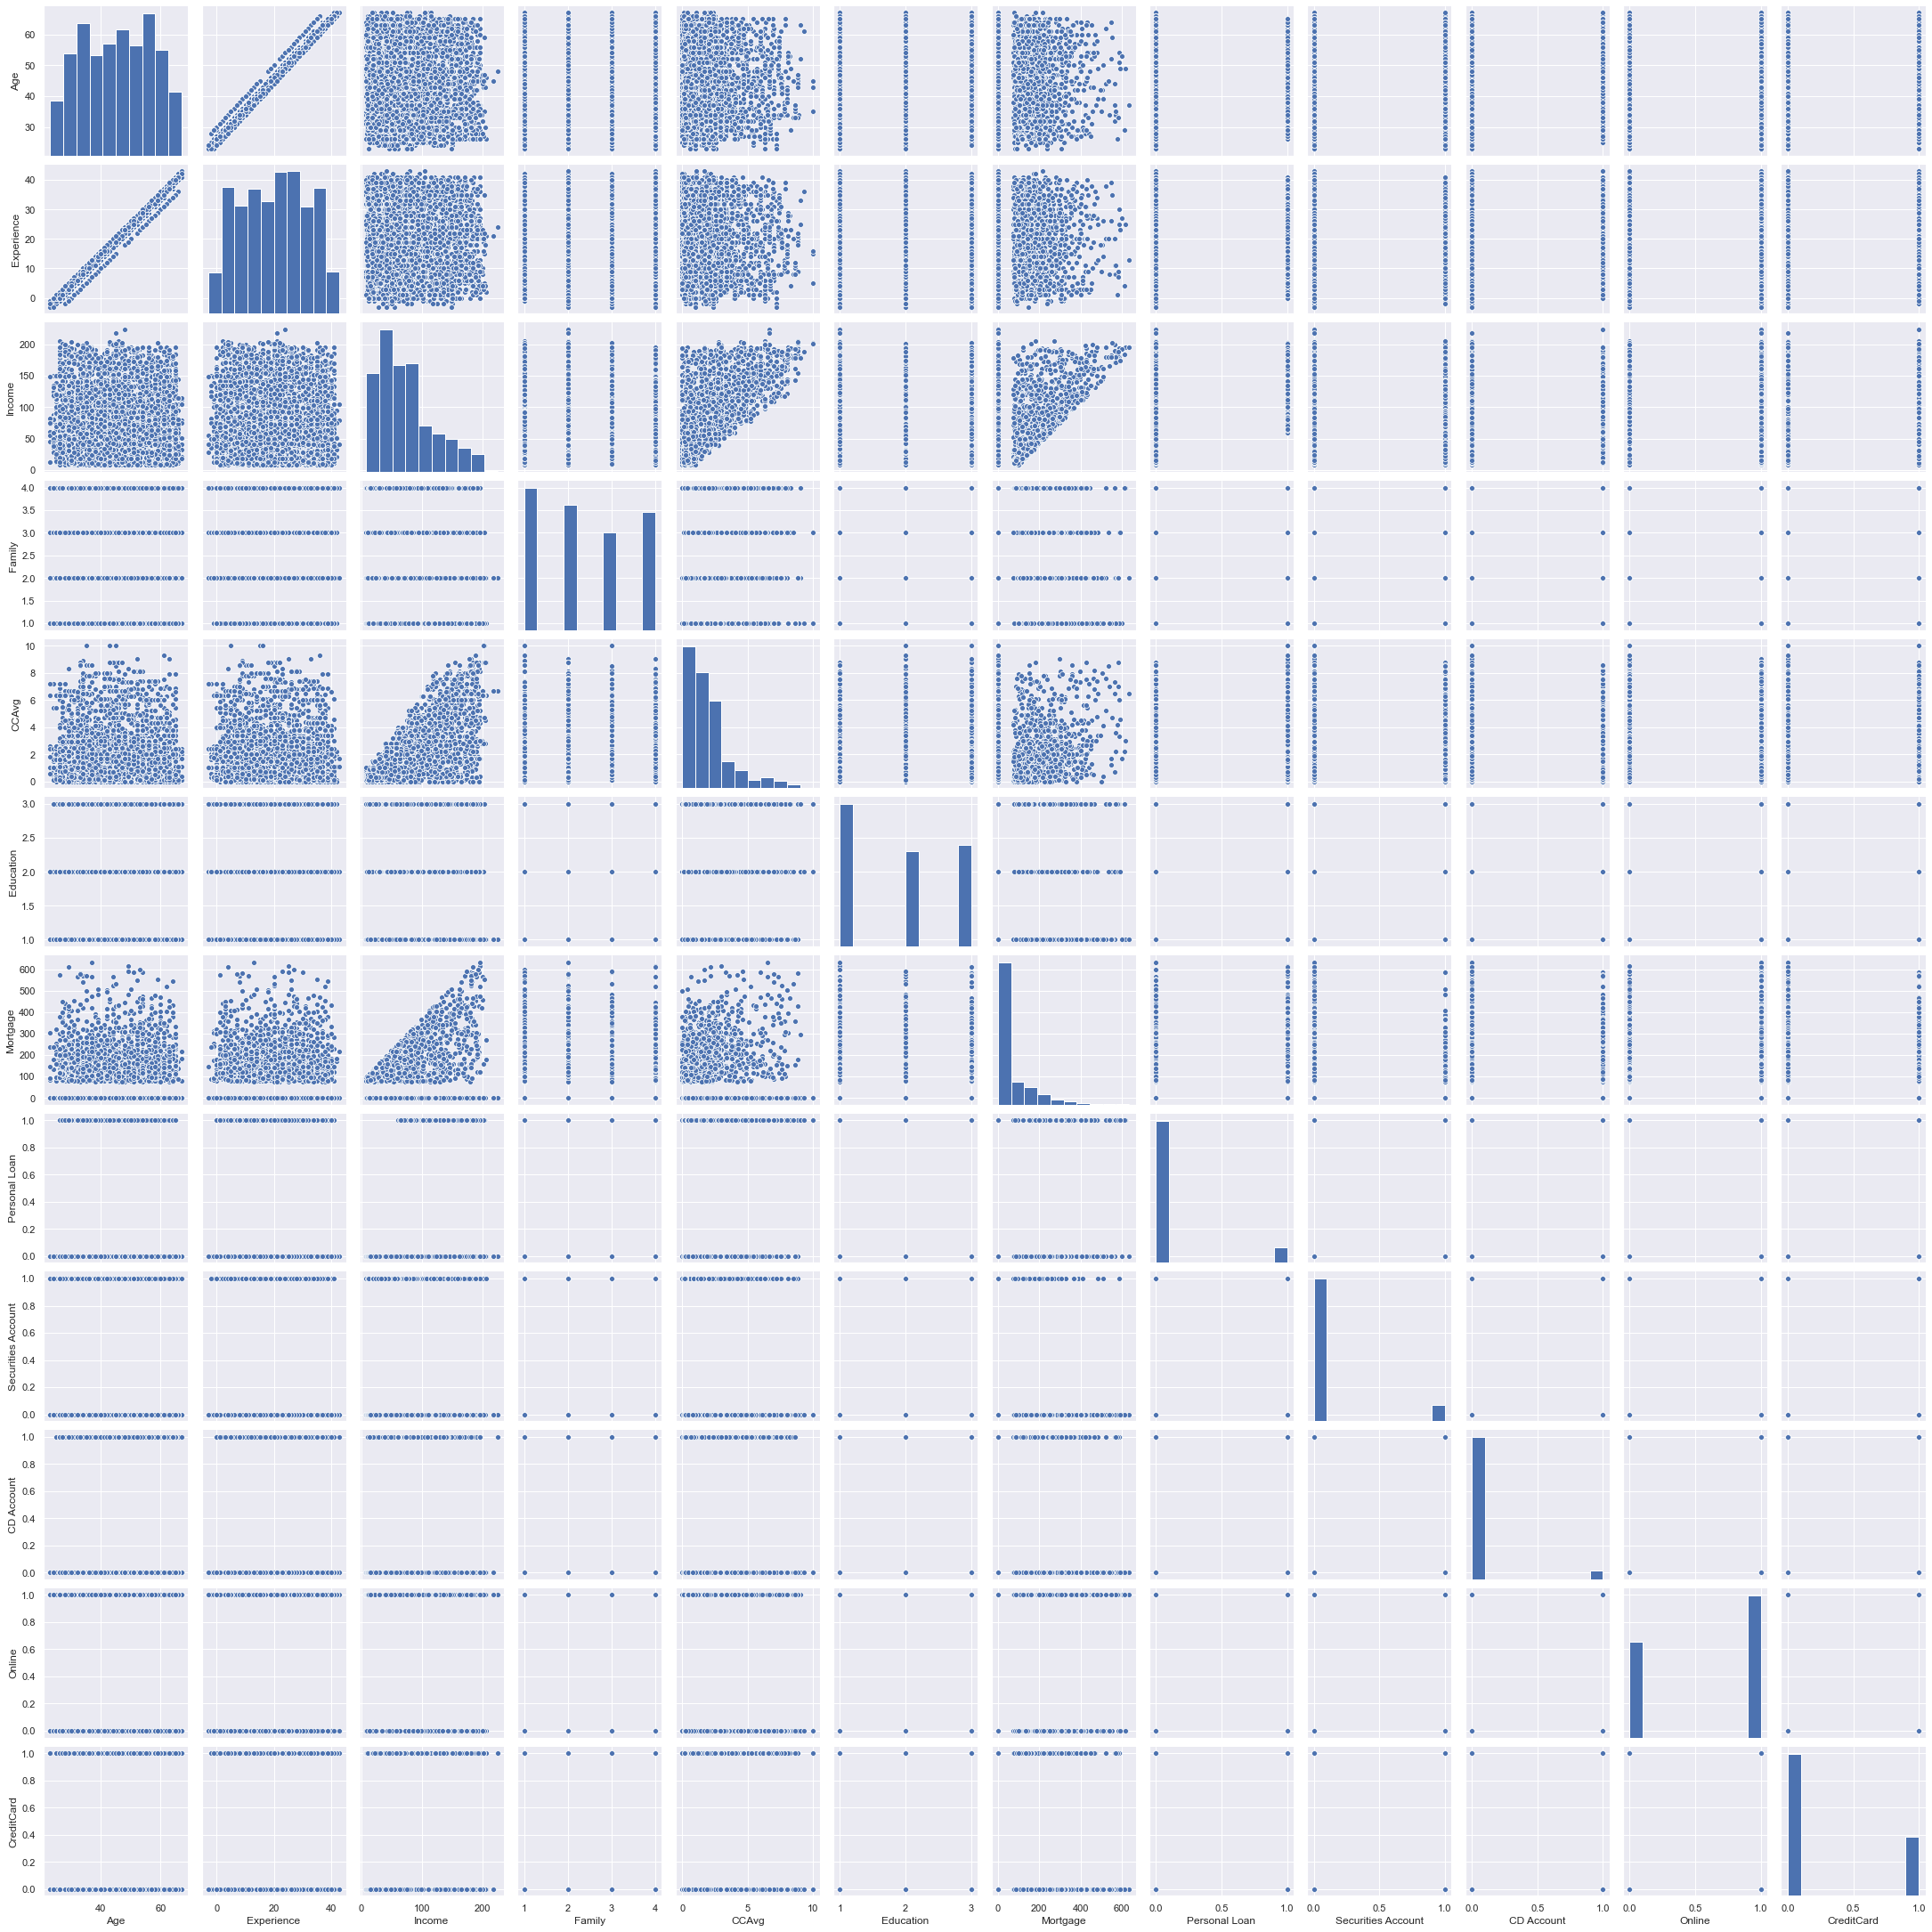

In [23]:
#Other bivariate plot
sns.pairplot(bank_ds2)

#### Get Ready with the data

* Since 'Experience' has some odd negative values, we might want to replace these with the mean of the Experience or capped the negatives to 0. I added both to the dataset and will test which version gives better fit to the model.
* Created duplicate columns for Education and Family since I plan to create some dummy variables for these. Need to retain them both to play around with the model variables



In [24]:
bank_ds2['Experience_Avg'] = np.where(bank_ds2['Experience']<0, 20, bank_ds2['Experience']) #replaced by the mean
bank_ds2['Experience_Zero'] = np.where(bank_ds2['Experience']<0, 0, bank_ds2['Experience']) #replaced by 0
bank_ds2['Orig_Education']= bank_ds2['Education']
bank_ds2['Orig_Family']= bank_ds2['Family']
bank_ds2.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Experience_Avg,Experience_Zero,Orig_Education,Orig_Family
0,25,1,49,4,1.6,1,0,0,1,0,0,0,1,1,1,4
1,45,19,34,3,1.5,1,0,0,1,0,0,0,19,19,1,3
2,39,15,11,1,1.0,1,0,0,0,0,0,0,15,15,1,1
3,35,9,100,1,2.7,2,0,0,0,0,0,0,9,9,2,1
4,35,8,45,4,1.0,2,0,0,0,0,0,1,8,8,2,4


In [25]:
#Create version of the dataset with categorical dummy variables
bank_ds2_w_cat = pd.get_dummies(bank_ds2, columns=['Education','Family'])
bank_ds2_w_cat.describe()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,...,Experience_Zero,Orig_Education,Orig_Family,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,...,20.119600,1.881000,2.396400,0.419200,0.280600,0.300200,0.294400,0.259200,0.202000,0.244400
std,11.463166,11.467954,46.033729,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,...,11.440484,0.839869,1.147663,0.493478,0.449337,0.458391,0.455818,0.438239,0.401532,0.429774
min,23.000000,-3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,...,20.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,...,30.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,43.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
#Create dataframes for the predictors vs outcome variable

X = bank_ds2_w_cat.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = bank_ds2_w_cat['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

#Split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

x_train.shape
x_test.shape

(3500, 20)

(1500, 20)

In [27]:
#Check if split was done correctly
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bank_ds2_w_cat.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bank_ds2_w_cat.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [28]:
#Distribution of target values across different datasets
print("Original Dataset Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(bank_ds2_w_cat.loc[bank_ds2_w_cat['Personal Loan'] == 1]), (len(bank_ds2_w_cat.loc[bank_ds2_w_cat['Personal Loan'] == 1])/len(bank_ds2_w_cat.index)) * 100))
print("Original Dataset Loan False Values   : {0} ({1:0.2f}%)".format(len(bank_ds2_w_cat.loc[bank_ds2_w_cat['Personal Loan'] == 0]), (len(bank_ds2_w_cat.loc[bank_ds2_w_cat['Personal Loan'] == 0])/len(bank_ds2_w_cat.index)) * 100))
print("")
print("Training Dataset Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Dataset Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Dataset Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Dataset Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Dataset Personal Loan True Values    : 480 (9.60%)
Original Dataset Loan False Values   : 4520 (90.40%)

Training Dataset Personal Loan True Values    : 334 (9.54%)
Training Dataset Personal Loan False Values   : 3166 (90.46%)

Test Dataset Personal Loan True Values        : 146 (9.73%)
Test Dataset Personal Loan False Values       : 1354 (90.27%)



We are working on a good train and test datasets in here as target % are almost distributed the same in each dataset; approximately 10%.

### 4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance.

In predictive modeling, before coming up with our final model, we test and transform our predictor variables to come up with the best fit parsimonious model. We have to be cautious on adding too many variables in the model as well as different versions of our predictors. It is nicer if we perform automatic feature selection of variables but this will suffice since total number of varaiables arent that much. Below are the different iterations I tried playing with some of the variables in the model, I will then use these predictors to perform model fitting in sklearn.

##### Different Model Iterations including different versions of the predictor variables

In [29]:
# Model v1: All non-transformed predictors included; Experience replaced by average is used.
logit_model_v1=sm.Logit(y_train,x_train.drop(['Experience','Experience_Zero','Education_1','Education_2','Education_3','Family_1','Family_2','Family_3','Family_4'],axis=1))
result_v1=logit_model_v1.fit()
print(result_v1.summary())


Optimization terminated successfully.
         Current function value: 0.169968
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.4603
Time:                        03:23:55   Log-Likelihood:                -594.89
converged:                       True   LL-Null:                       -1102.2
Covariance Type:            nonrobust   LLR p-value:                1.292e-211
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.3088      0.016    -19.408      0.000      -0.340      -0.278
Incom

In [30]:
# Model v2: Dropped CCAvg and Mortgage as both are insignificant at pvalue < 0.05
logit_model_v2=sm.Logit(y_train,x_train.drop(['CCAvg','Mortgage','Experience','Experience_Zero','Education_1','Education_2','Education_3','Family_1','Family_2','Family_3','Family_4'],axis=1))
result_v2=logit_model_v2.fit()
print(result_v2.summary())


Optimization terminated successfully.
         Current function value: 0.170148
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3491
Method:                           MLE   Df Model:                            8
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.4597
Time:                        03:23:57   Log-Likelihood:                -595.52
converged:                       True   LL-Null:                       -1102.2
Covariance Type:            nonrobust   LLR p-value:                1.904e-213
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.3083      0.016    -19.411      0.000      -0.339      -0.277
Incom

In [31]:
# Model v3: All non-transformed predictors included; Experience replaced by zero is used.
logit_model_v3=sm.Logit(y_train,x_train.drop(['Experience','Experience_Avg','Education_1','Education_2','Education_3','Family_1','Family_2','Family_3','Family_4'],axis=1))
result_v3=logit_model_v3.fit()
print(result_v3.summary())

Optimization terminated successfully.
         Current function value: 0.139828
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.5560
Time:                        03:23:59   Log-Likelihood:                -489.40
converged:                       True   LL-Null:                       -1102.2
Covariance Type:            nonrobust   LLR p-value:                4.227e-257
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.4848      0.025    -19.264      0.000      -0.534      -0.436
Incom

In [32]:
# Model v4: Model v3 without CCAvg and Mortgage as both are insignificant at pvalue < 0.05
logit_model_v4=sm.Logit(y_train,x_train.drop(['Mortgage','CCAvg','Experience','Experience_Avg','Education_1','Education_2','Education_3','Family_1','Family_2','Family_3','Family_4'],axis=1))
result_v4=logit_model_v4.fit()
print(result_v4.summary())

Optimization terminated successfully.
         Current function value: 0.140379
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3491
Method:                           MLE   Df Model:                            8
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.5542
Time:                        03:24:02   Log-Likelihood:                -491.33
converged:                       True   LL-Null:                       -1102.2
Covariance Type:            nonrobust   LLR p-value:                1.876e-258
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.4817      0.025    -19.269      0.000      -0.531      -0.433
Incom

In [33]:
# Model v5: Used Experience_Zero as this gives a better model explainability; transformed Education into categorical
logit_model_v5=sm.Logit(y_train,x_train.drop(['Experience','Experience_Avg','Education_1','Orig_Education','Family_1','Family_2','Family_3','Family_4'],axis=1))
result_v5=logit_model_v5.fit()
print(result_v5.summary())

Optimization terminated successfully.
         Current function value: 0.129394
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.5891
Time:                        03:24:04   Log-Likelihood:                -452.88
converged:                       True   LL-Null:                       -1102.2
Covariance Type:            nonrobust   LLR p-value:                8.586e-272
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.4709      0.025    -19.017      0.000      -0.519      -0.422
Incom

In [34]:
# Model v6: Similar to Model v5 predictors but without Mortgage as insignificant at pvalue < 0.05
logit_model_v6=sm.Logit(y_train,x_train.drop(['Mortgage','Experience','Experience_Avg','Education_1','Orig_Education','Family_1','Family_2','Family_3','Family_4'],axis=1))
result_v6=logit_model_v6.fit()
print(result_v6.summary())

Optimization terminated successfully.
         Current function value: 0.129513
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.5887
Time:                        03:24:06   Log-Likelihood:                -453.29
converged:                       True   LL-Null:                       -1102.2
Covariance Type:            nonrobust   LLR p-value:                1.110e-272
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.4698      0.025    -19.032      0.000      -0.518      -0.421
Incom

In [35]:
# Model v7: Used Experience_Zero as this gives a better fit and model explainability; transformed Education and Family into categorical
logit_model_v7=sm.Logit(y_train,x_train.drop(['Experience','Experience_Avg','Education_1','Orig_Education','Family_1','Orig_Family'],axis=1))
result_v7=logit_model_v7.fit()
print(result_v7.summary())

Optimization terminated successfully.
         Current function value: 0.124136
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.6058
Time:                        03:24:08   Log-Likelihood:                -434.48
converged:                       True   LL-Null:                       -1102.2
Covariance Type:            nonrobust   LLR p-value:                1.204e-277
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.4562      0.024    -18.866      0.000      -0.504      -0.409
Incom

In [36]:
# Model v8:  Similar to Model v7 predictors but without Mortgage as insignificant at pvalue < 0.05
logit_model_v8=sm.Logit(y_train,x_train.drop(['Mortgage','Experience','Experience_Avg','Education_1','Orig_Education','Family_1','Orig_Family'],axis=1))
result_v8=logit_model_v8.fit()
print(result_v8.summary())

Optimization terminated successfully.
         Current function value: 0.124315
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.6053
Time:                        03:24:10   Log-Likelihood:                -435.10
converged:                       True   LL-Null:                       -1102.2
Covariance Type:            nonrobust   LLR p-value:                2.079e-278
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.4547      0.024    -18.880      0.000      -0.502      -0.408
Incom

In [37]:
# Model v9: Similar to model v5 but removed Income : You can see a big drop in explainability of the model
logit_model_v9=sm.Logit(y_train,x_train.drop(['Income','Mortgage','Experience','Experience_Avg','Education_1','Orig_Education','Family_1','Family_2','Family_3','Family_4'],axis=1))
result_v9=logit_model_v9.fit()
print(result_v9.summary())

Optimization terminated successfully.
         Current function value: 0.205481
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.3475
Time:                        03:24:12   Log-Likelihood:                -719.19
converged:                       True   LL-Null:                       -1102.2
Covariance Type:            nonrobust   LLR p-value:                4.251e-159
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.2490      0.014    -17.783      0.000      -0.276      -0.222
CCAvg

#### Model v10: Best starting model so far! Similar to Model 6 where Education is transformed to categorical and Family variable is treated numeric. Removed Mortgage as it is insignificant as pvalue < 0.05. Decided to remove CCAvg as well as you might notice from the correlation plot that Income and CCAvg are highly positively correlated. Removing Income would decrease explainability of the model by half, so it isn't a good idea. You might also notice that CCAvg tends to be insignificant and signifcant at some model iterations. I don't see consistency with this variable. Further along, I tried to calculate its effect to the model and you will see that CCAvg has the minimum influence to the model among all predictors included. Removing this didn't hurt the model explainability and improve parsimony in the model.

#### A pseudo R-squared of 58.53% indicates that 58.53% of the uncertainty of the intercept only model is explained by the full model. Model v10 might not have the highest Rsquared in all these iterations but by considering the number of predictors in the model and contribution each, this is my best model as of now. I will work on these variables in modeling using Sklearn.

In [38]:
# Model v10
logit_model_v10=sm.Logit(y_train,x_train.drop(['CCAvg','Mortgage','Experience','Experience_Avg','Education_1','Orig_Education','Family_1','Family_2','Family_3','Family_4'],axis=1))
result_v10=logit_model_v10.fit()
print(result_v10.summary())

Optimization terminated successfully.
         Current function value: 0.130604
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.5853
Time:                        03:24:17   Log-Likelihood:                -457.11
converged:                       True   LL-Null:                       -1102.2
Covariance Type:            nonrobust   LLR p-value:                4.015e-272
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.4637      0.024    -19.043      0.000      -0.511      -0.416
Incom

In [39]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(result_v10.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=result_v10.pvalues
pd.options.display.float_format = '{:.3f}'.format
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
lgcoef

,coef,Odds_ratio,probability,pval
CD Account,3.708,40.765,0.976,0.000
Education_3,3.608,36.892,0.974,0.000
Education_2,3.354,28.631,0.966,0.000
Orig_Family,0.596,1.815,0.645,0.000
Experience_Zero,0.464,1.590,0.614,0.000
Income,0.057,1.059,0.514,0.000
Age,-0.464,0.629,0.386,0.000
Online,-0.782,0.457,0.314,0.000
Securities Account,-0.887,0.412,0.292,0.010
CreditCard,-1.037,0.354,0.262,0.000


* Customers with CD Account have a 98% probability of accepting the personal loan
* Customers with higher level of education (Graduate and Advanced Professionals) have around 97% probability of accepting the personal loan.
* Customers who use credit cards have only 27% probability of accepting the loan offered.

### Model building using Logistic Regression from Sklearn 

We will use the sklearn to build the model and make predictions. Based from the initial modeling iterations, I come up with these variables that are necessary to the model.

In [40]:
#Create a trimmed version of train and test dataset
x_train2 = x_train.drop(['CCAvg','Mortgage','Experience','Experience_Avg','Education_1','Orig_Education','Family_1','Family_2','Family_3','Family_4'],axis=1)
x_test2 =x_test.drop(['CCAvg','Mortgage','Experience','Experience_Avg','Education_1','Orig_Education','Family_1','Family_2','Family_3','Family_4'],axis=1)

#Call logistic regression: change maximum iteration for convergence
logreg = LogisticRegression(random_state=123,max_iter=1000)

In [41]:
# Checking for the variable influence/importance of predictors in the model
# One simple approach is looking at the magnitude of its coefficient times the standard deviation of the corresponding parameter in the data
logreg_var_imp = LogisticRegression(random_state=123,max_iter=1000)
logreg_var_imp.fit(x_train2 / np.std(x_train2, 0), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
for idx, col_name in enumerate(x_train2.columns):
    print("The variable importance for {} is {}".format(col_name, logreg_var_imp.coef_[0][idx]))

The variable importance for Age is 0.1640177626577015
The variable importance for Income is 2.707332414489389
The variable importance for Securities Account is -0.23523420356069694
The variable importance for CD Account is 0.8546265314392585
The variable importance for Online is -0.34505029497363654
The variable importance for CreditCard is -0.4169222806994568
The variable importance for Experience_Zero is -0.09102546155055466
The variable importance for Orig_Family is 0.7406824884908696
The variable importance for Education_2 is 1.4773849695696406
The variable importance for Education_3 is 1.5484444725005775


This means that if Income is excluded in modeling, model explainability and fit will be significantly lessen. Next to affect fit are EDUCATION variables. Lastly, Experience has the least influence in the model. Same concept with pvalues just in different form.

In [43]:
#Fit the model with the variables selected
logreg.fit(x_train2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
for idx, col_name in enumerate(x_train2.columns):
    print("The coefficient for {} is {}".format(col_name, logreg.coef_[0][idx]))

The coefficient for Age is 0.04408045492760093
The coefficient for Income is 0.05740820632898433
The coefficient for Securities Account is -0.5306235690756215
The coefficient for CD Account is 3.0654641592327097
The coefficient for Online is -0.6113095218491612
The coefficient for CreditCard is -0.7440656748409599
The coefficient for Experience_Zero is -0.037335283686451316
The coefficient for Orig_Family is 0.655392206353389
The coefficient for Education_2 is 3.0002670163642096
The coefficient for Education_3 is 3.108353373070424


In [45]:
y_predict_skl = logreg.predict(x_test2)

In [46]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    mt.pyplot.ylabel('Observed')
    mt.pyplot.xlabel('Predicted')
    mt.pyplot.show()

Training accuracy 0.9562857142857143

Testing accuracy 0.9613333333333334

Confusion Matrix


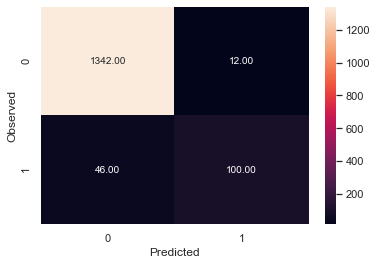

None


Recall: 0.684931506849315

Precision: 0.8928571428571429

F1 Score: 0.7751937984496124

Roc Auc Score: 0.8380344388013193


In [47]:
print("Training accuracy",logreg.score(x_train2,y_train))  
print()
print("Testing accuracy",logreg.score(x_test2, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict_skl))
print()
print()
print("Recall:",recall_score(y_test,y_predict_skl))
print()
print("Precision:",precision_score(y_test,y_predict_skl))
print()
print("F1 Score:",f1_score(y_test,y_predict_skl))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_skl))

* Confusion matrix telling us that 1442 customers with correct predictions and 58 incorrect predictions. That's 96% model accuracy.
* 68% of the actual loan takers are identified correctly by the model.
* 89% of the model predicted to be loan takers are correct.
* 78% of the time that the model is precise and robust.

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

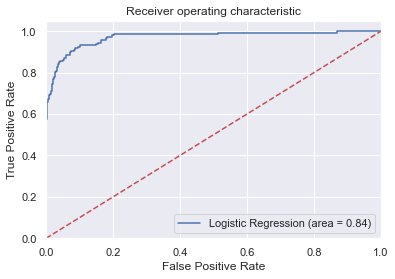

In [48]:
#AUC ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test2))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test2)[:,1])
mt.pyplot.figure()
mt.pyplot.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
mt.pyplot.plot([0, 1], [0, 1],'r--')
mt.pyplot.xlim([0.0, 1.0])
mt.pyplot.ylim([0.0, 1.05])
mt.pyplot.xlabel('False Positive Rate')
mt.pyplot.ylabel('True Positive Rate')
mt.pyplot.title('Receiver operating characteristic')
mt.pyplot.legend(loc="lower right")
mt.pyplot.savefig('Log_ROC')
mt.pyplot.show()

High AUC means that a model is accurate and 84% precision; it is capable of distinguishing between customers who will take personal loan or not. Thus, this model seems to be good at predicting 0 as 0 and 1 as 1.

### 5. Give your reasoning on how can the model perform better?

* Adjust different parameters of the logistic regression, i.e compare using different solvers, class weight, C , etc.
* In practice, since we are working with a minimal data, a single model is not good enough to test robustness and preciseness of the outcome, I suggest that we do k fold cross validation across the train dataset or oversampling to test significance, strength and consistency of each variable in our model.

But for now, we will only be adjusting parameters of the logistic regression to improve the model

In [49]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [50]:
#Running a loop to check different values of 'solver'
#All solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'
#Adjusted maximum iteration for convergence
#liblinear has the highest test accuracy in here
#newton Cg has the highest train accuracy


train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=123,penalty='l2',C =0.75,max_iter=10000,solver=i)  # changing values of solver
    model.fit(x_train2, y_train) 
    y_predict = model.predict(x_test2)     
    train_score.append(round(model.score(x_train2, y_train),3))
    test_score.append(round(model.score(x_test2, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.956, 0.956, 0.953, 0.953, 0.951]

[0.96, 0.96, 0.965, 0.964, 0.959]


In [51]:
#Changing values of solver to l1
#Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'newton-cg'

train_score=[]
test_score=[]
solver = ['liblinear','saga'] 
for i in solver:
    model = LogisticRegression(random_state=123,penalty='l1', C =0.75,max_iter=10000,solver=i)  # changing values of solver
    model.fit(x_train2, y_train) 
    y_predict = model.predict(x_test2)     
    train_score.append(round(model.score(x_train2, y_train),3))
    test_score.append(round(model.score(x_test2, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

['liblinear', 'saga']

[0.955, 0.951]

[0.964, 0.961]


In [53]:
# try adding class weight to balanced
model = LogisticRegression(random_state=123,penalty='l1',class_weight='balanced',solver='liblinear') 

model.fit(x_train2, y_train) 

y_predict = model.predict(x_test2)     

print("Training accuracy",model.score(x_train2,y_train))  
print()
print("Testing accuracy",model.score(x_test2, y_test))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Training accuracy 0.8991428571428571

Testing accuracy 0.892


In [54]:
# Running a loop to check different values of 'C'
# Best testing accuracy is obtained for C=0.5, which is default

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=123,penalty='l1', solver='liblinear', C=i)  # changing values of C
    model.fit(x_train2, y_train) 
    y_predict = model.predict(x_test2)     
    train_score.append(round(model.score(x_train2,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test2, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.907, 0.947, 0.953, 0.954, 0.955, 0.954]

[0.914, 0.957, 0.965, 0.965, 0.964, 0.963]


### Model v10.2 : This is our final model!

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Training accuracy 0.954

Testing accuracy 0.9646666666666667

Confusion Matrix


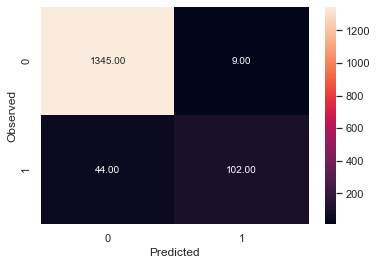

None

Recall: 0.6986301369863014

Precision: 0.918918918918919

F1 Score: 0.7937743190661479

Roc Auc Score: 0.845991582525647


In [55]:
#Model v10.2
model2 = LogisticRegression(random_state=123,penalty='l1', solver='liblinear',C=0.5, max_iter=1000) 
model2.fit(x_train2, y_train)
y_predict = model2.predict(x_test2)
print("Training accuracy",model2.score(x_train2,y_train))  
print()
print("Testing accuracy",model2.score(x_test2, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

* Confusion matrix telling us that 1447 customers with correct predictions and 53 incorrect predictions. That's 96% model accuracy.
* 70% of the actual loan takers are identified correctly by the model.Higher than the previous.
* 92% of the model predicted to be loan takers are correct. Higher than the previous.
* 79% of the time that the model is precise and robust. Higher than the previous model without defined solver that we have.
* Higher AUC with 85% precision; it is capable of distinguishing between customers who will take personal loan or not. Thus, this model seems to be better at predicting 0 as 0 and 1 as 1.

## 5. Business Insights


**Confusion matrix means**

##### True Positive (observed=1,predicted=1):

Predicted that personal loan will be offered and the customer accepted the loan

##### False Positive (observed=0,predicted=1):

Predicted that personal loan will be offered and the customer did not accept the loan

##### True Negative (observed=0,predicted=0):

Predicted that personal loan will not be offered and the customer did not accept the loan

##### False Negative (observed=1,predicted=0):

Predicted that personal loan will not be offered and the customer accepted the loan

Main objective is to identify customers who will more likely to accept personal loan offered by the Thera bank. In line with this, the model aims to help determine profiles of their possible target market who will increase the success ratio of the campaign with a minimal budget. 

Since the bank wants to offer personal loan to its eligible customers, minimizing the number of false positive is helpful. In this case, they will also minimize cost spending on campaigns for customers who will not likely to accept the loan in the future given that they stated to have minimal budget on running campaigns. This is taken care of by the precision metric which is fairly high in this model; 92% of customers that the model predicted to be loan takers are correct. However, major objective as well is for the bank to focus on the success ratio, offering to customers who will more likely to accept the loan, thus, minimizing number of false negatives is important too as success ratio will be lower when campaigns are not offered to customer who will more likely to accept the loan. Recall of 70% isn't bad for a model. This model shows a good balance between metrics to incorporate both concerns in the objective (F1 Score of 79%); it tries to minimize cost of campaign for false positives customers and increase success ratio by minimizing false negatives.

At 85% precision via AUC, model is capable distinguishing between customers who will take the loan or not.The bank has a tool now to determine customers who will more likely to accept personal loans once offered.